In [1]:
import os 
import sys
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

from gensim import models
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
import matplotlib.pyplot as plt

from doc_embedding.moyenne import *
import json

In [2]:
#fichier sous la forme d'un dataframe
skipgram_model = models.KeyedVectors.load_word2vec_format('../../data/tunning/skipgram.kv')
data = pd.DataFrame(skipgram_model.vectors,index=skipgram_model.index_to_key)

with open("../../data/docs.json") as file:
    docs = json.load(file)
moy_embedding_tfidf = word_emb_vers_doc_emb_moyenne(docs=docs, modele=skipgram_model, methode = 'TF-IDF')

In [3]:
data=pd.DataFrame(moy_embedding_tfidf)
X = data.values
#nombre d'observations n et de variables p
n = data.shape[0]
p = data.shape[1]

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components = p)

pca.fit(X_scaled)
coord = pca.fit_transform(X_scaled)


### Analyse variance 

In [4]:
#variance expliquée
eigval = (n-1)/n*pca.explained_variance_

In [5]:
#proportion de variance expliquée
prop_var=pca.explained_variance_ratio_

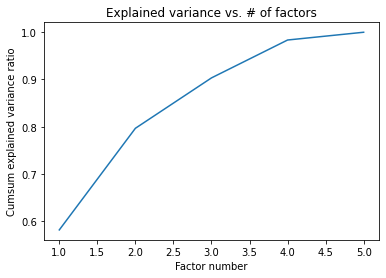

In [6]:
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(pca.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

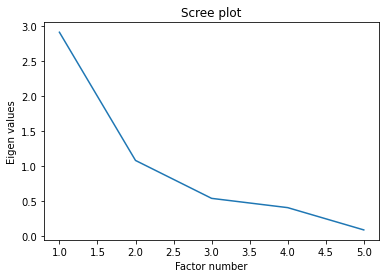

In [7]:
#scree plot
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

### on garde deux dimensions

In [8]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components = 2)
reduc_skipgram_model = pca.fit_transform(X_scaled)

### Graphique

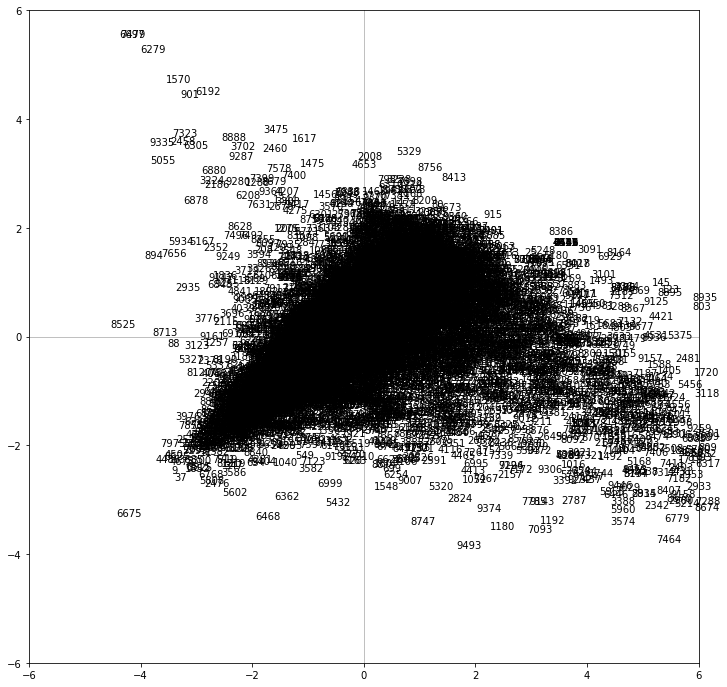

In [9]:
#Individus

#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée

#placement des étiquettes des observations
for i in range(n):
 plt.annotate(data.index[i],(reduc_skipgram_model[i,0],reduc_skipgram_model[i,1]))

#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

#affichage
plt.show()